# Data Pre-Processing

## Scope of this notebook:

### 1.  Data Overview
### 2.  Add Sentiment Feature to data set
### 3.  Words people use in Ice Cream reviews
### 4.  Add Adjectives Feature to data set
### 5.  Most common positive and negative adjectives
### 6. Most Popular Ice Creams Reviewed
### 7.  Split data into training and testing

In [2]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns
import string

# might need to run 'pip install spacy' in anaconda prompt for pythondata environment
# might need to run 'python -m spacy download en' in anaconda prompt for pythondata environment
import spacy
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS

# Tip: run "pip install wordcloud" in anaconda prompty for pythondata environment
from wordcloud import WordCloud

from collections import Counter

In [3]:
# read data source
df = pd.read_csv("Resources/helpful_clean_reviews_combined.csv")
df.head()

,key,stars,helpful_yes,helpful_no,text,rating
0,0_breyers,1,11,0,I am interested in the flavoring components us...,4.1
1,0_breyers,1,7,0,"Boy, was I surprised when I got my Bryers home...",4.1
2,0_breyers,1,8,0,I havent purchased this product in awhile and ...,4.1
3,0_breyers,1,4,0,The Natural Vanilla recipe change to include T...,4.1
4,0_breyers,5,21,2,I had the same issue with breyers. I finally f...,4.1


#### 1. Data Overview

In [4]:
# data overview
print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nFeatures : ', df.columns.tolist())

# Is printing Missing values redundant considering code below?
print ('\nMissing values :  ', df.isnull().sum().values.sum())
print ('\nUnique values :  \n', df.nunique())

Rows     :  3424
Columns  :  6

Features :  ['key', 'stars', 'helpful_yes', 'helpful_no', 'text', 'rating']

Missing values :   0

Unique values :  
 key             184
stars             5
helpful_yes      66
helpful_no       20
text           3419
rating           11
dtype: int64


In [5]:
# find missing values and feature view data types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          3424 non-null   object 
 1   stars        3424 non-null   int64  
 2   helpful_yes  3424 non-null   int64  
 3   helpful_no   3424 non-null   int64  
 4   text         3424 non-null   object 
 5   rating       3424 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 160.6+ KB


key            0
stars          0
helpful_yes    0
helpful_no     0
text           0
rating         0
dtype: int64

In [6]:
# create data_df
df_data = pd.DataFrame(df)
df_data

,key,stars,helpful_yes,helpful_no,text,rating
0,0_breyers,1,11,0,I am interested in the flavoring components us...,4.1
1,0_breyers,1,7,0,"Boy, was I surprised when I got my Bryers home...",4.1
2,0_breyers,1,8,0,I havent purchased this product in awhile and ...,4.1
3,0_breyers,1,4,0,The Natural Vanilla recipe change to include T...,4.1
4,0_breyers,5,21,2,I had the same issue with breyers. I finally f...,4.1
...,...,...,...,...,...,...
3419,9_hd,5,1,0,I tried the new flavor with layers and it was ...,4.9
3420,9_hd,5,1,0,"love this ice cream, taste fantastic!! will ne...",4.9
3421,9_hd,5,1,0,This is my favorite cream. Where can I find th...,4.9
3422,9_hd,5,1,0,The best tasting ice cream out there! It is ve...,4.9


#### 2.  Add Sentiment Feature to data set

In [7]:
# create sentiment column with binary values
df_data['sentiment'] = pd.Series(dtype='int64')
df_data.head()

,key,stars,helpful_yes,helpful_no,text,rating,sentiment
0,0_breyers,1,11,0,I am interested in the flavoring components us...,4.1,NaN
1,0_breyers,1,7,0,"Boy, was I surprised when I got my Bryers home...",4.1,NaN
2,0_breyers,1,8,0,I havent purchased this product in awhile and ...,4.1,NaN
3,0_breyers,1,4,0,The Natural Vanilla recipe change to include T...,4.1,NaN
4,0_breyers,5,21,2,I had the same issue with breyers. I finally f...,4.1,NaN


In [8]:
# assign 1 for positive sentiment, 0 for negative
# https://stackoverflow.com/questions/30953299/pandas-if-row-in-column-a-contains-x-write-y-to-row-in-column-b
def applyFunc(s):
    if s >= 5:
        return 1
    else:
        return 0

# populate column        
df_data['sentiment'] = df_data['stars'].apply(applyFunc)
df_data.head()

,key,stars,helpful_yes,helpful_no,text,rating,sentiment
0,0_breyers,1,11,0,I am interested in the flavoring components us...,4.1,0
1,0_breyers,1,7,0,"Boy, was I surprised when I got my Bryers home...",4.1,0
2,0_breyers,1,8,0,I havent purchased this product in awhile and ...,4.1,0
3,0_breyers,1,4,0,The Natural Vanilla recipe change to include T...,4.1,0
4,0_breyers,5,21,2,I had the same issue with breyers. I finally f...,4.1,1


In [9]:
# Create positive sentiment dataframe

df_positive_sentiment = df_data[df_data['sentiment'] ==1]
df_positive_sentiment

,key,stars,helpful_yes,helpful_no,text,rating,sentiment
4,0_breyers,5,21,2,I had the same issue with breyers. I finally f...,4.1,1
17,0_breyers,4,45,3,The taste of Breyers vanilla ice cream decline...,4.1,1
42,0_breyers,4,2,0,This product no longer has specks of vanilla i...,4.1,1
56,0_breyers,5,53,32,After trying Bryers Natural Vanilla Ice Cream ...,4.1,1
68,0_breyers,4,1,0,"Hi. My husband and I like the ice cream, but w...",4.1,1
...,...,...,...,...,...,...,...
3419,9_hd,5,1,0,I tried the new flavor with layers and it was ...,4.9,1
3420,9_hd,5,1,0,"love this ice cream, taste fantastic!! will ne...",4.9,1
3421,9_hd,5,1,0,This is my favorite cream. Where can I find th...,4.9,1
3422,9_hd,5,1,0,The best tasting ice cream out there! It is ve...,4.9,1


In [10]:
# Create negative sentiment dataframe

df_negative_sentiment = df_data[df_data['sentiment'] ==0]
df_negative_sentiment

,key,stars,helpful_yes,helpful_no,text,rating,sentiment
0,0_breyers,1,11,0,I am interested in the flavoring components us...,4.1,0
1,0_breyers,1,7,0,"Boy, was I surprised when I got my Bryers home...",4.1,0
2,0_breyers,1,8,0,I havent purchased this product in awhile and ...,4.1,0
3,0_breyers,1,4,0,The Natural Vanilla recipe change to include T...,4.1,0
5,0_breyers,1,4,0,I rarely eat ice cream these days but bought t...,4.1,0
...,...,...,...,...,...,...,...
3349,8_talenti,2,3,1,"I dont buy a lot of ice cream, gelato, or swee...",4.3,0
3352,8_talenti,3,3,0,The top layers are great. Tastes like cheeseca...,4.3,0
3358,8_talenti,3,2,1,I was really excited to try this flavor but wa...,4.3,0
3361,8_talenti,3,1,0,All of your flavors are such high quality and ...,4.3,0


#### 3.  Words people use in Ice Cream reviews

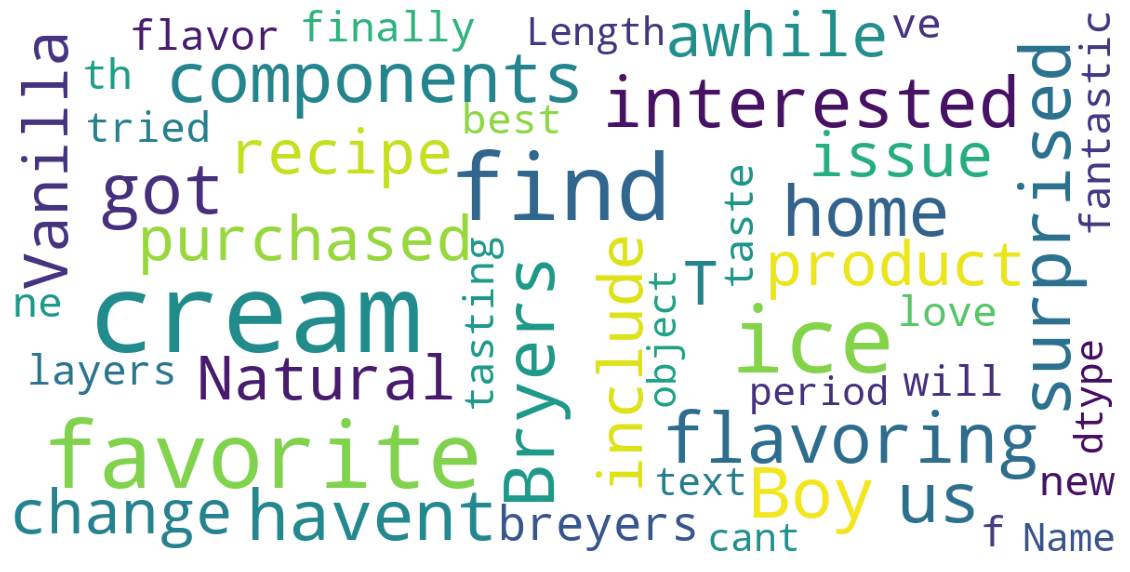

In [11]:
# WordCloud for full dataset
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        # Chose 10 as random state. We can play with this.
        random_state=10    ).generate(str(data))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_data['text'])

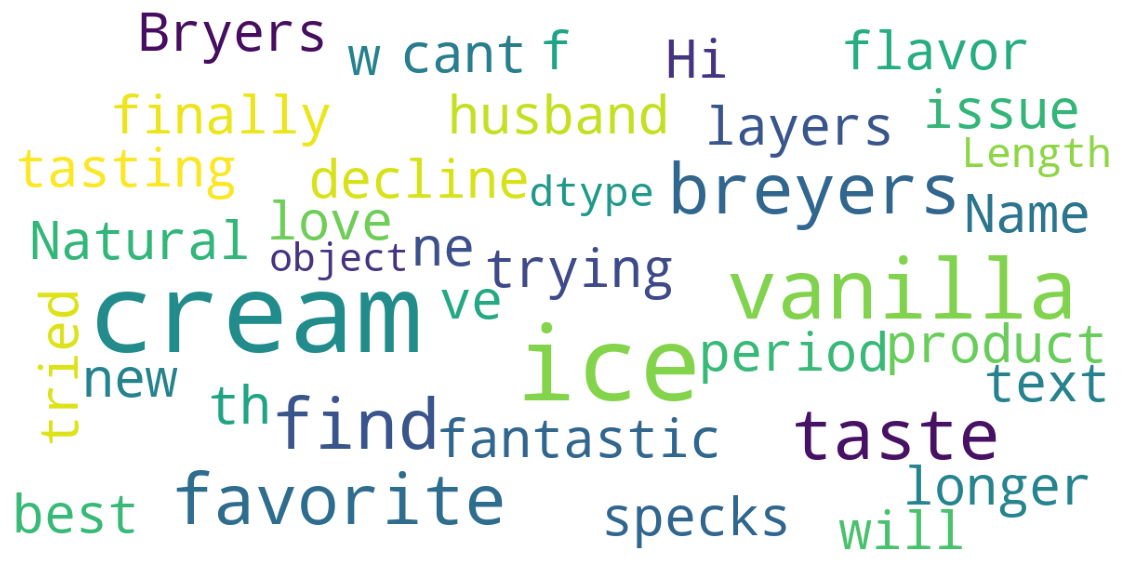

In [12]:
# WordCloud for positive sentiment

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        # Chose 10 as random state. We can play with this.
        random_state=10    ).generate(str(data))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_positive_sentiment['text'])

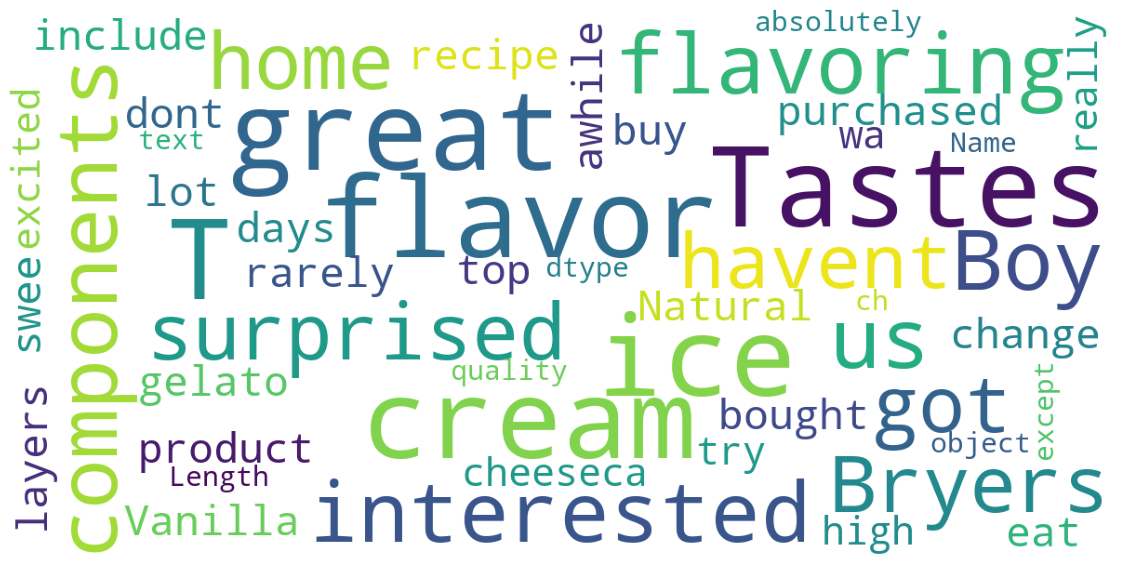

In [13]:
# WordCloud for negative sentiment

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        # Chose 10 as random state. We can play with this.
        random_state=10    ).generate(str(data))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_negative_sentiment['text'])

#### 4.  Add Adjectives Feature to data set

In [14]:
# creating the nlp object
nlp = spacy.load("en_core_web_sm")

# defining the stop_words and punctuations we want to remove
punctuations = string.punctuation
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [15]:
# Loop to get just the adjectives from each review

words_adj = []

for line in df_data['text']:
    
    doc= nlp(line)
    
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.pos_ == 'ADJ']
    
    words_adj.append(tokens)

In [16]:
# create a new column with the adjectives
df_data['words_adj'] = pd.Series(words_adj)

df_data.head()

,key,stars,helpful_yes,helpful_no,text,rating,sentiment,words_adj
0,0_breyers,1,11,0,I am interested in the flavoring components us...,4.1,0,"[interested, natural, good, natural, obvious, ..."
1,0_breyers,1,7,0,"Boy, was I surprised when I got my Bryers home...",4.1,0,"[surprised, frozen, second, different]"
2,0_breyers,1,8,0,I havent purchased this product in awhile and ...,4.1,0,"[surprised, vegetable, natural]"
3,0_breyers,1,4,0,The Natural Vanilla recipe change to include T...,4.1,0,"[negative, previous, rich, creamy, off, percep..."
4,0_breyers,5,21,2,I had the same issue with breyers. I finally f...,4.1,1,"[same, natural, natural]"


In [17]:
df_data.dtypes

key             object
stars            int64
helpful_yes      int64
helpful_no       int64
text            object
rating         float64
sentiment       object
words_adj       object
dtype: object

#### 5.  Most common positive and negative adjectives

In [18]:
# Get the 20 most common adjectives from positive sentiment

from collections import Counter

positive_adj= df_data[df_data['sentiment']=='1']['words_adj']

positive_words= [line for line in positive_adj for line in set(line)]

positive_adj_count= Counter(positive_words).most_common(20)

print(positive_adj_count)

[('good', 899), ('favorite', 472), ('creamy', 351), ('delicious', 317), ('perfect', 312), ('more', 304), ('other', 294), ('amazing', 288), ('great', 286), ('sweet', 281), ('new', 227), ('first', 175), ('rich', 172), ('only', 166), ('smooth', 163), ('free', 155), ('little', 142), ('well', 126), ('hard', 116), ('few', 116)]


In [19]:
# Get the 20 most common adjectives from negative sentiment

negative_adj= df_data[df_data['sentiment']=='0']['words_adj']

negative_words= [line for line in negative_adj for line in set(line)]

negative_adj_count= Counter(negative_words).most_common(20)

print(negative_adj_count)

[('good', 138), ('disappointed', 106), ('other', 81), ('favorite', 81), ('more', 76), ('bad', 76), ('great', 75), ('same', 63), ('new', 59), ('last', 59), ('first', 50), ('few', 50), ('disappointing', 48), ('sweet', 48), ('little', 48), ('hard', 47), ('creamy', 46), ('well', 40), ('sure', 39), ('excited', 38)]


#### 6. Most Popular Ice Creams Reviewed

In [20]:
# Most popular product reviewed
df_data['key'].value_counts()[0:20]

16_breyers    86
0_breyers     74
4_bj          62
37_bj         53
6_talenti     53
37_talenti    51
24_talenti    50
33_bj         50
8_bj          47
44_talenti    45
7_breyers     45
5_talenti     44
20_bj         42
15_hd         42
31_talenti    41
34_bj         40
41_bj         40
34_talenti    40
46_bj         39
19_bj         37
Name: key, dtype: int64

In [21]:
# Most popular Positive Sentiment product reviewed
df_positive_sentiment['key'].value_counts()[0:20]

16_breyers    80
37_bj         53
33_bj         50
37_talenti    49
8_bj          45
24_talenti    44
4_bj          43
5_talenti     41
51_bj         37
41_bj         37
19_bj         37
36_hd         36
44_talenti    34
34_talenti    34
34_bj         33
36_bj         33
26_breyers    31
46_bj         30
7_breyers     30
20_bj         30
Name: key, dtype: int64

In [22]:
# Most popular Negative Sentiment product reviewed
df_negative_sentiment['key'].value_counts()[0:20]

0_breyers     69
6_talenti     34
15_hd         27
16_bj         22
10_breyers    22
55_bj         20
12_breyers    20
4_bj          19
7_breyers     15
15_breyers    15
13_bj         14
31_talenti    14
3_talenti     13
61_hd         12
40_talenti    12
20_bj         12
44_bj         12
28_bj         11
44_talenti    11
46_bj          9
Name: key, dtype: int64

#### 7.  Split data into training and testing

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
# Segment the features from the target
X = df_data['text']
y = df['sentiment']

In [25]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

# extract features
review_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern= r'(?u)\b\w\w+\b',
    stop_words='english',
    ngram_range=(1, 1) )
review_vectorizer.fit(X)

train_features = review_vectorizer.transform(X)

In [26]:
# Normal train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_features, 
                                                    y, 
                                                    random_state=1)
Counter(y_train)

Counter({'1': 2057, '0': 511})